<a href="https://colab.research.google.com/github/waiyankyaw961999/ML_DL_learningpath/blob/master/Guided%20project/%20Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project-Based Course Overview
Course Name: [Exploratory Data Analysis with Seaborn](https://www.coursera.org/learn/exploratory-data-analysis-seaborn)


Instructors: Snehan Kekre

This is a project-based course which takes approximately 1.5 hrs to finish.

##Course Objectives
In this course, we are going to focus on two learning objectives:

1. Produce data visualizations with Seaborn.
2.  Apply graphical techniques used in exploratory data analysis (EDA).

By the end of this course, you will be able to generate publication-quality graphs using Seaborn and Python to analyze data.

#Tumor Diagnosis (Part 1): Exploratory Data Analysis

About the Dataset:

The [Breast Cancer Diagnostic data](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) is available on the UCI Machine Learning Repository. This database is also available through the [UW CS ftp server](https://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WDBC/).

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


##Task 1: Introduction and Importing the Data
* In this task, we are introduced to the project and learning outcomes.
* Once we are familiarized with the Rhyme interface, we begin working in Jupyter Notebooks, a web-based interactive computational environment for creating notebook documents.
* Next, we will import essential libraries such as NumPy, pandas, Seaborn, and matplotlib.
* Lastly, we use pandas to load the Breast Cancer Wisconsin (Diagnostic) Data Set.

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/MC_Colab/Data/Breast_Cancer.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Attribute Information:

* ID number
* Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

1. radius (mean of distances from center to points on the perimeter)
2. texture (standard deviation of gray-scale values)
3. perimeter
4 area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter^2 / area - 1.0)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.
Missing attribute values: none
Class distribution: 357 benign, 212 malignant

##Task 2: Separate Target from Features

* Now that the data set is in memory, we can explore the characteristics of its attributes and instances.
* We will drop columns that cannot be used for analysis and classification.
* Note that this does not constitute feature selection. We are dropping columns that have no bearing on the analysis we will be conducting, and will instead clutter our analysis. After producing descriptive statistics about the data, we will separate the target from the features.
* The target contains the diagnosis with binary class labels, M or B, for malignant and benign tumors respectively.

In [5]:
y = data.diagnosis
drop_cols = ['Unnamed: 32','id','diagnosis']
x = data.drop(drop_cols,axis = 1)
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


##Task 3: Diagnosis Distribution Visualization

* A very common question during model evaluation is, "Why isn't the model I've picked predictive?". Most often, it is a result of a class imbalance.
* In this task, we will use Seaborn's countplot() method to visualize the target distributions.
* We will also generate descriptive statistics about the features that summarize the central tendency, dispersion and shape of the data set's distribution.

Number of Benign Tumors 357
Number of Malignant Tumors 212


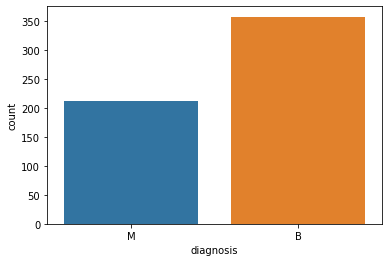

In [6]:
ax = sns.countplot(y,label='Count')
B,M = y.value_counts()
print('Number of Benign Tumors', B)
print('Number of Malignant Tumors', M)

In [7]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


##Task 4: Visualizing Standardized Data with Seaborn

* As the columns in the data set take on values of varying range, we need to standardize the data before proceeding with further analysis and visualization.
* To begin feature analysis, we use Seaborn's violinplot() method. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.

In [8]:
data = x 
data_std = (data-data.mean())/data.std()
data = pd.concat([y,data_std.iloc[:,0:10]],axis = 1)
data = pd.melt(data,id_vars = 'diagnosis',
               var_name = 'features',
               value_name = 'value')
data.head()

,diagnosis,features,value
0,M,radius_mean,1.096100
1,M,radius_mean,1.828212
2,M,radius_mean,1.578499
3,M,radius_mean,-0.768233
4,M,radius_mean,1.748758


##Task 5: Violin Plots and Box Plots

* We are using violin plots and box plots to identify features that best separate the data for classification.
* Box plots are especially useful in identifying outliers in the data.
* Using violin plots, we are also able to infer whether certain features are correlated.
* To minimize clutter in our visualizations, we divide the features into three batches of ten features and produce separate plots for them.

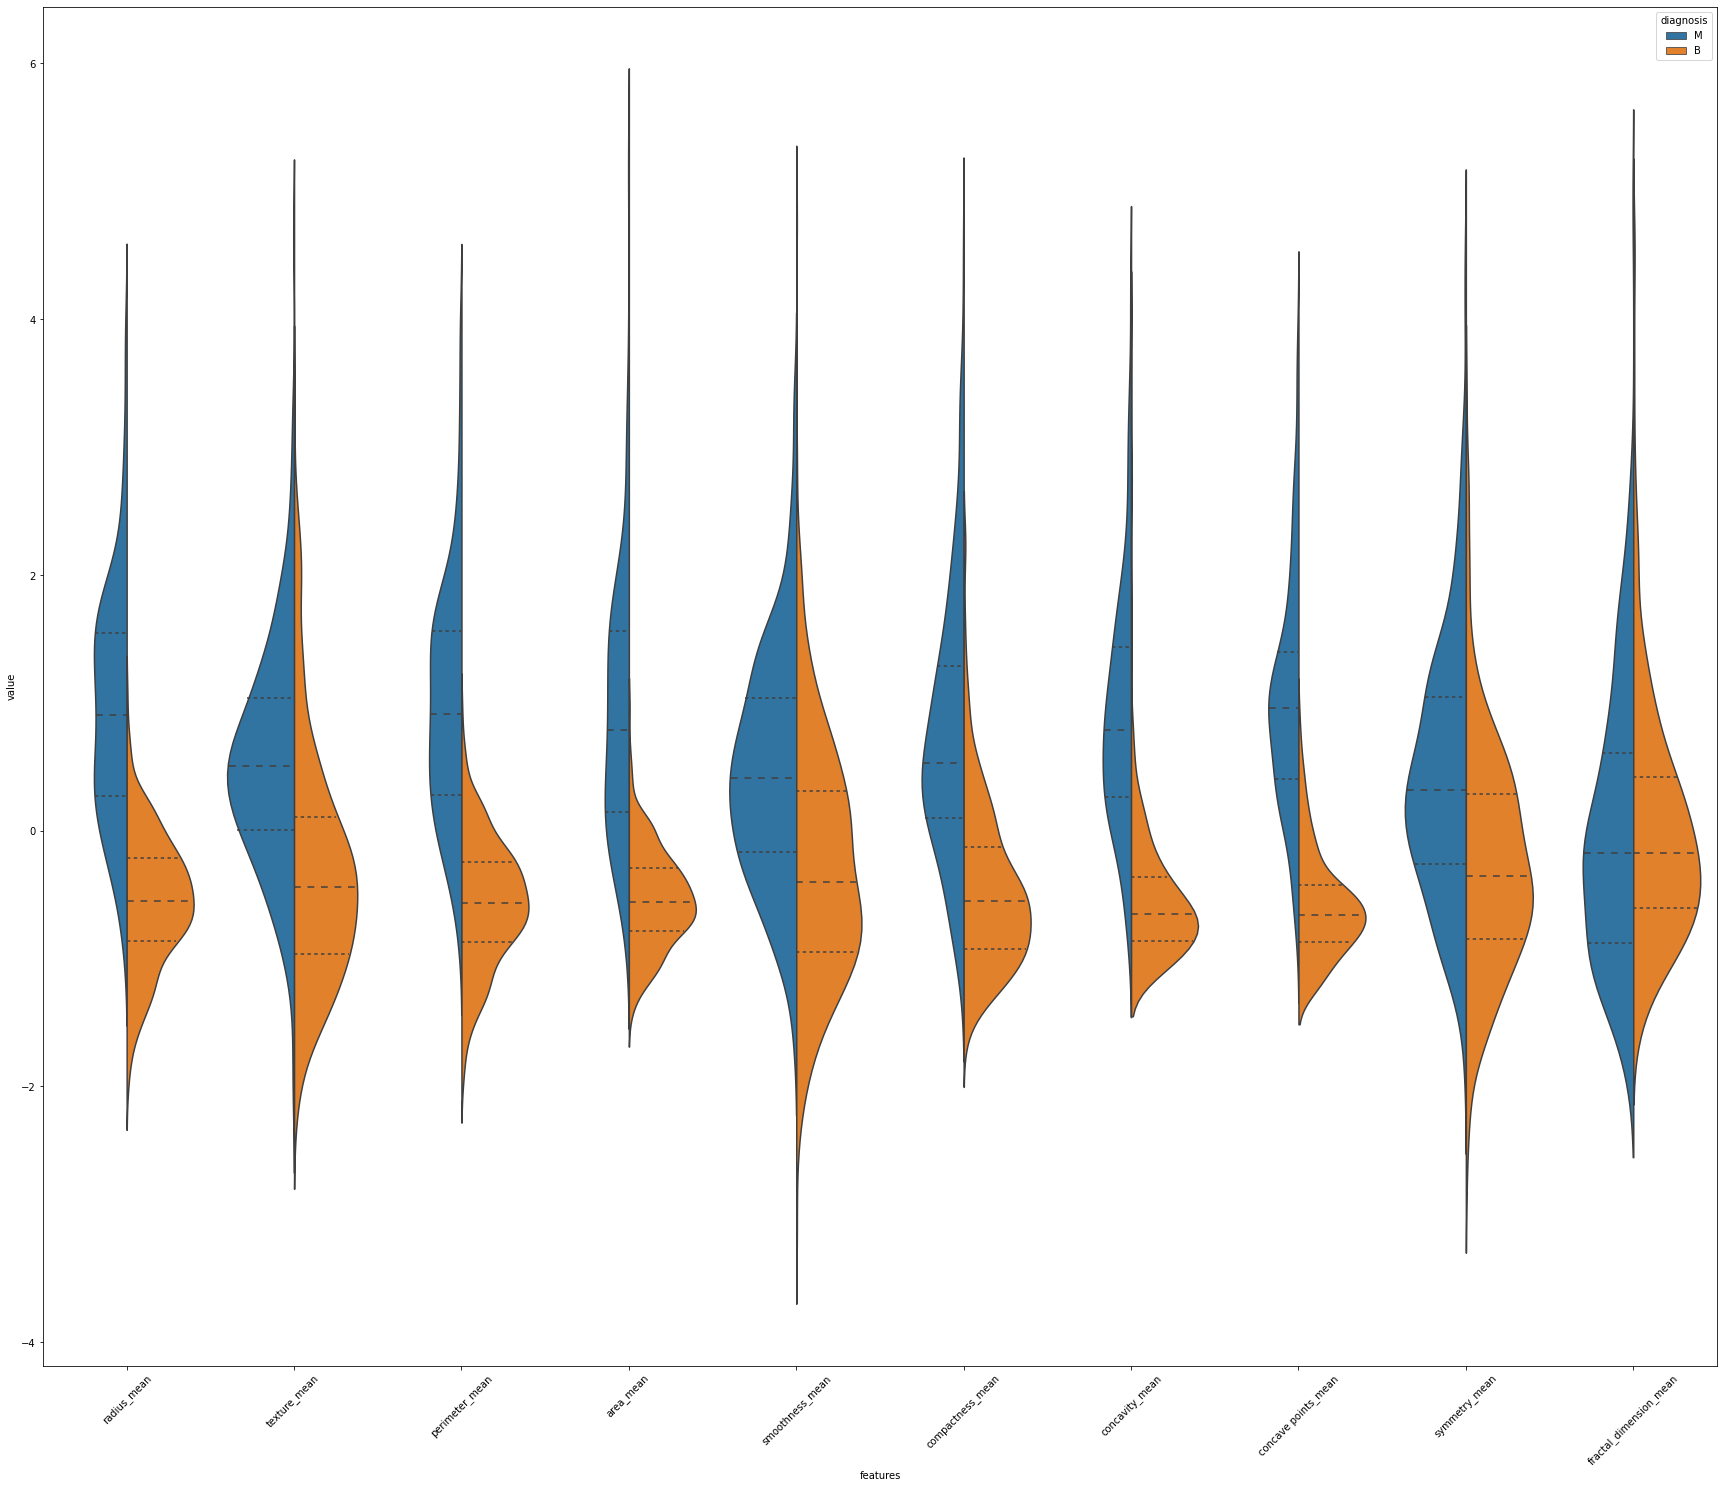

In [9]:
data = pd.concat([y,data_std.iloc[:,0:10]],axis = 1)
data = pd.melt(data,id_vars = 'diagnosis',
               var_name = 'features',
               value_name = 'value')
plt.figure(figsize = (30,25))
sns.violinplot(x = 'features', y = 'value', hue = 'diagnosis' ,data = data,split=True, inner ='quart');
plt.xticks(rotation=45);

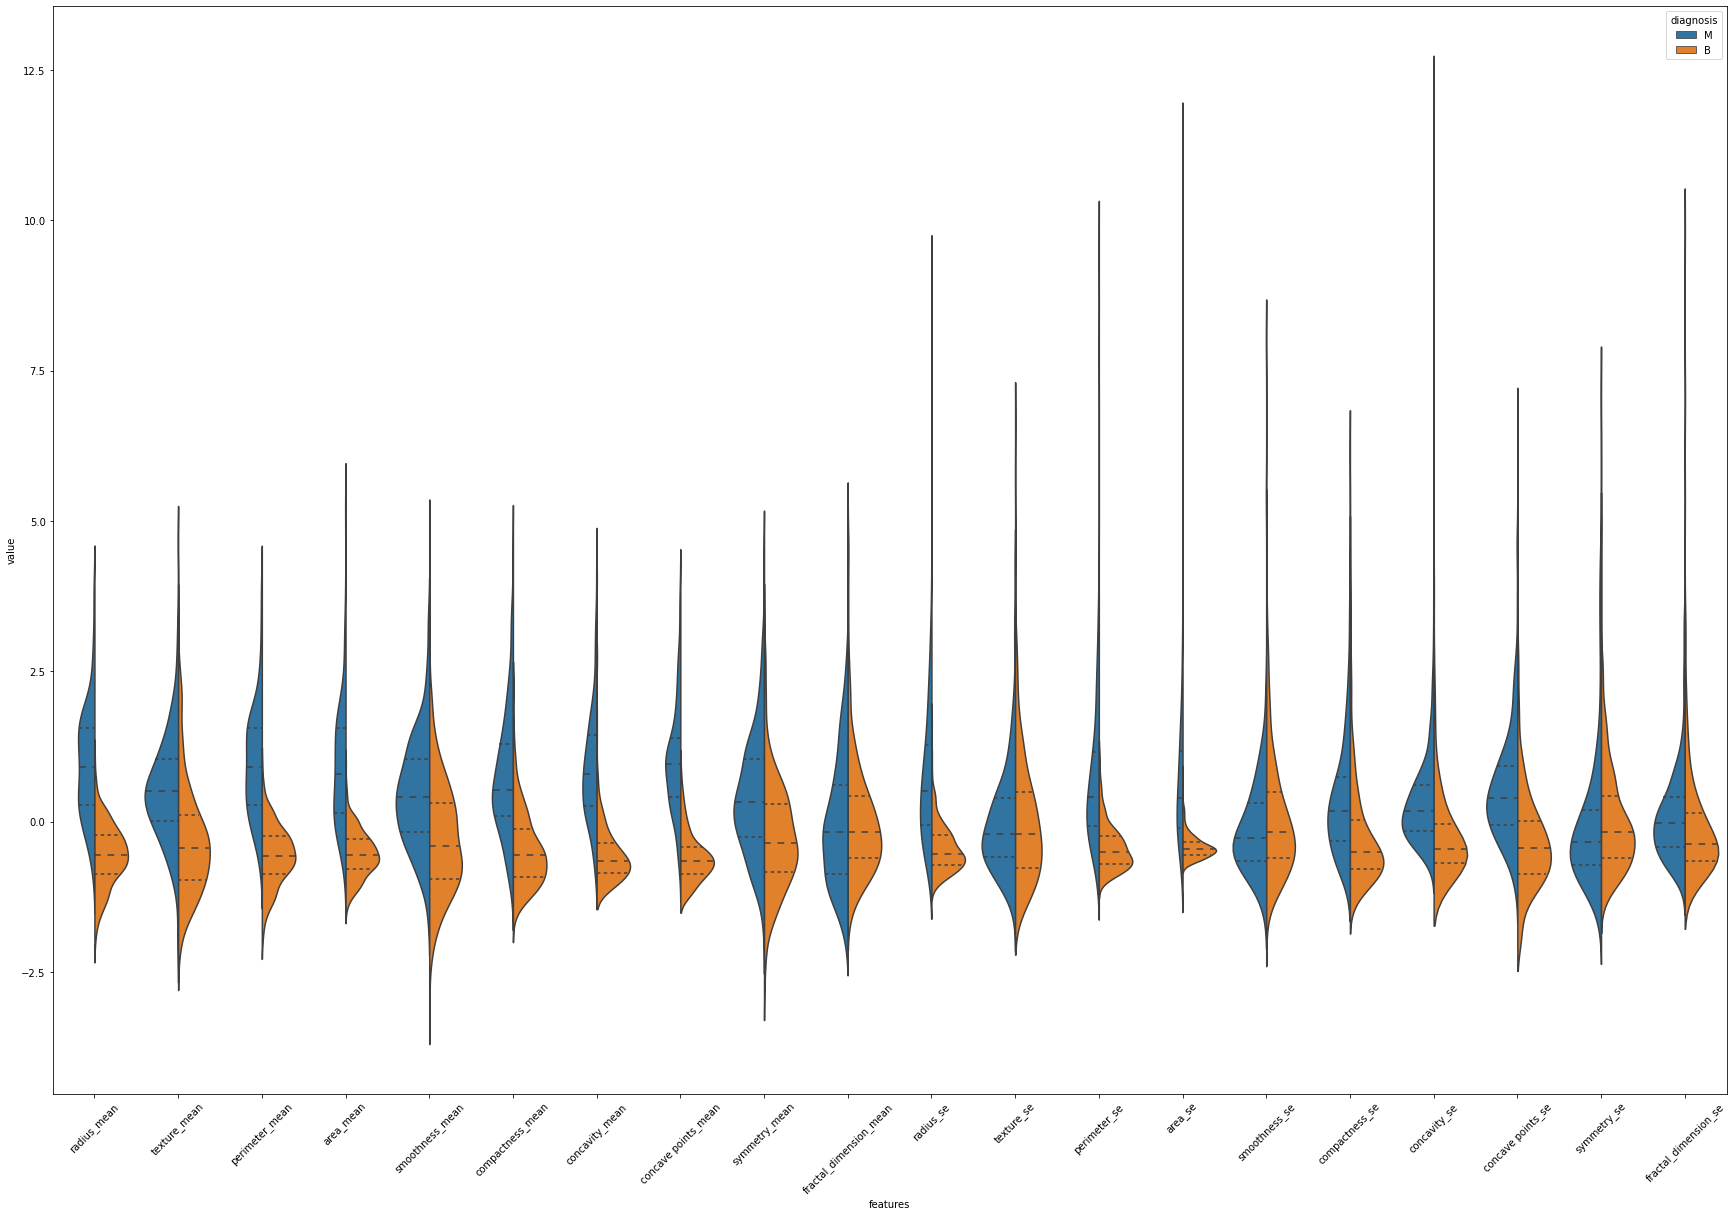

In [10]:
data = pd.concat([y,data_std.iloc[:,0:20]],axis = 1)
data = pd.melt(data,id_vars = 'diagnosis',
               var_name = 'features',
               value_name = 'value')
plt.figure(figsize = (30,20))
sns.violinplot(x = 'features', y = 'value', hue = 'diagnosis' ,data = data,split=True, inner ='quart');
plt.xticks(rotation=45);

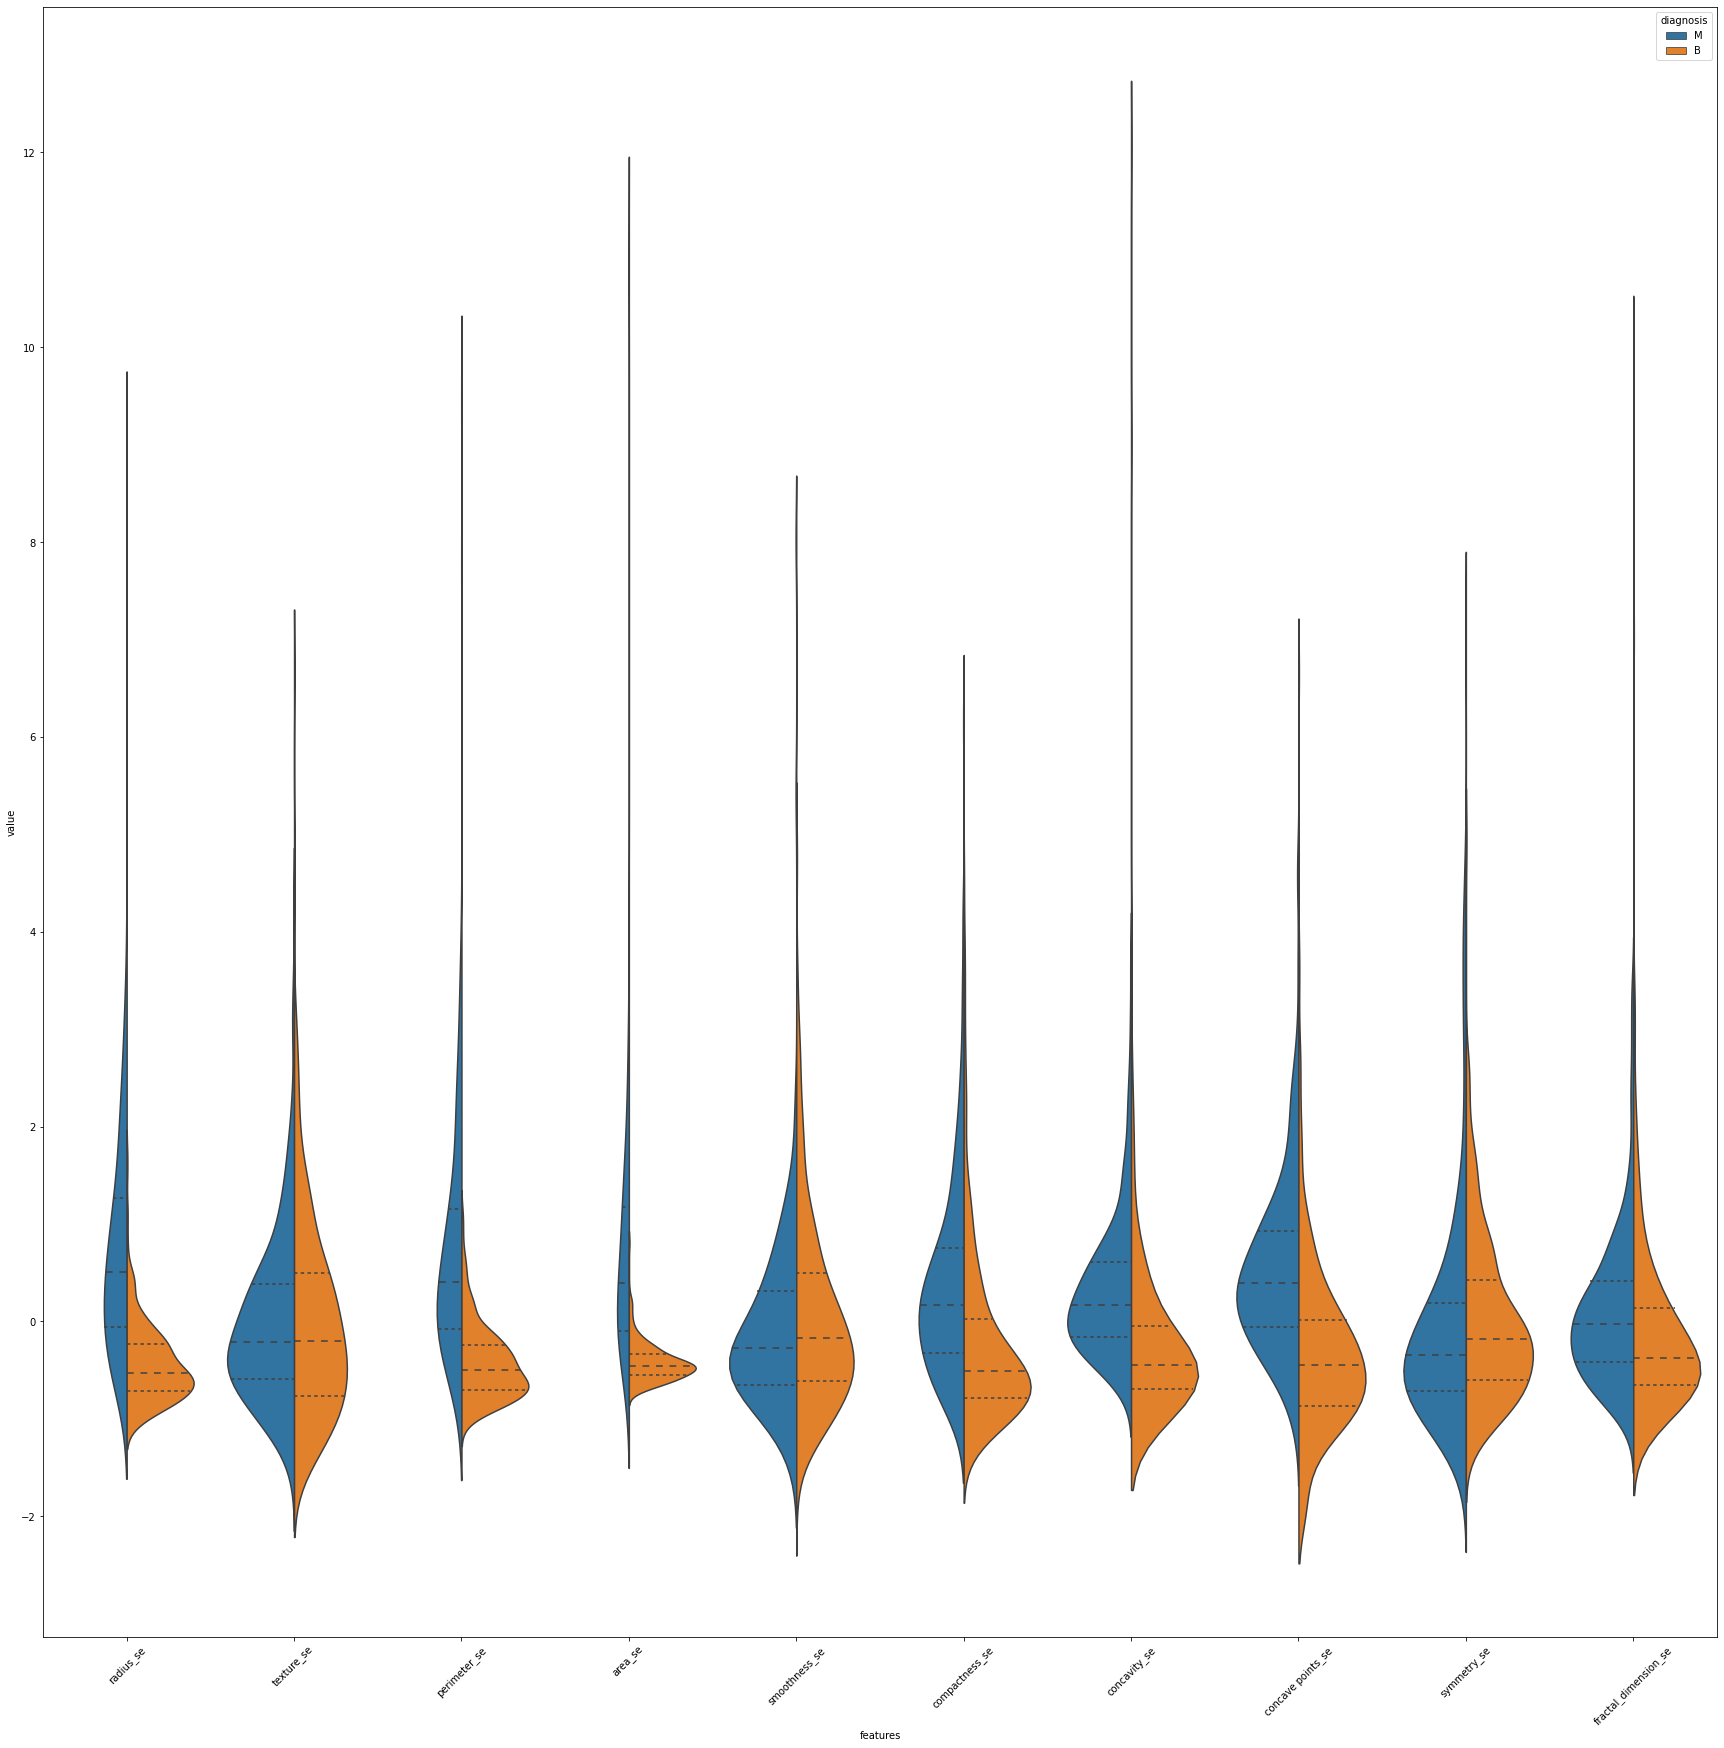

In [11]:
data = pd.concat([y,data_std.iloc[:,10:20]],axis = 1)
data = pd.melt(data,id_vars = 'diagnosis',
               var_name = 'features',
               value_name = 'value')
plt.figure(figsize = (30,30))
sns.violinplot(x = 'features', y = 'value', hue = 'diagnosis' ,data = data,split=True, inner ='quart');
plt.xticks(rotation=45);

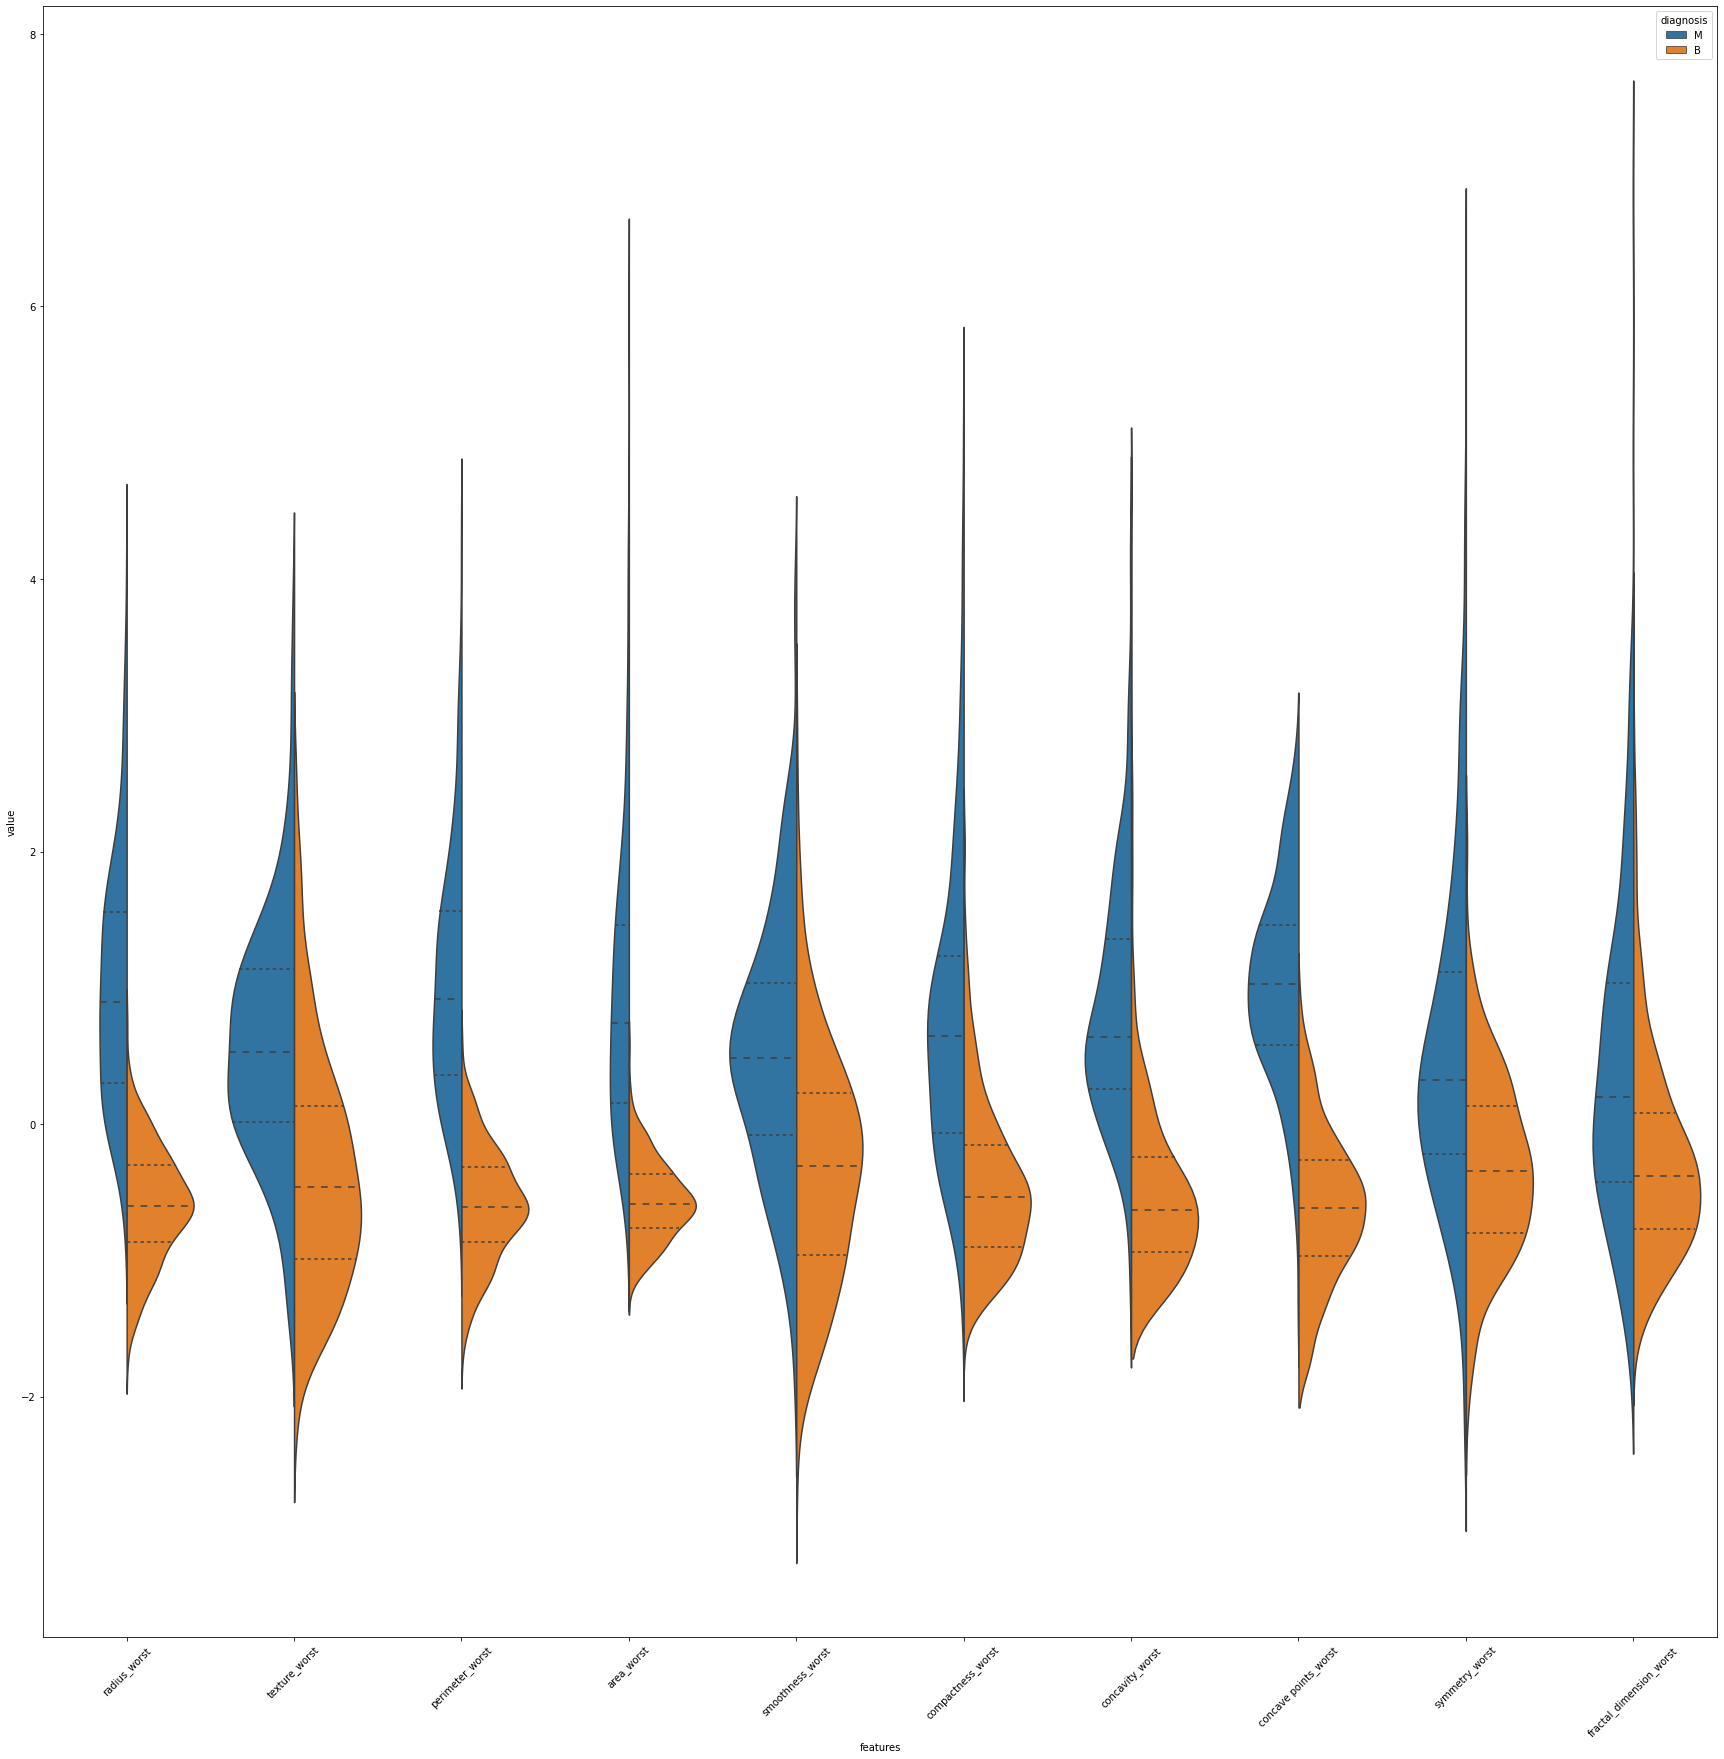

In [12]:
data = pd.concat([y,data_std.iloc[:,20:30]],axis = 1)
data = pd.melt(data,id_vars = 'diagnosis',
               var_name = 'features',
               value_name = 'value')
plt.figure(figsize = (30,30))
sns.violinplot(x = 'features', y = 'value', hue = 'diagnosis' ,data = data,split=True, inner ='quart');
plt.xticks(rotation=45);

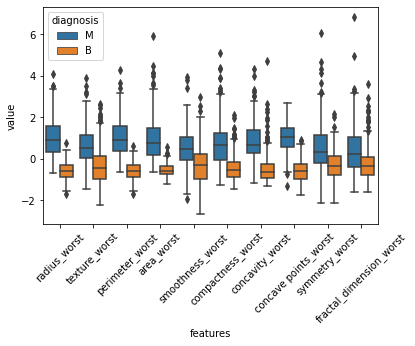

In [13]:
sns.boxplot(x='features',y='value',hue='diagnosis',data = data)
plt.xticks(rotation = 45);

##Task 6: Using Joint Plots for Feature Comparison

* Joint plots come in handy to illustrate the relationship between two features.
* We will use seaborn's jointplot() method to draw a scatter plot with marginal histograms and kernel density fits. We can examine the relationship between any two features using the Pearson correlation coefficient of the regression through our scatter plot.

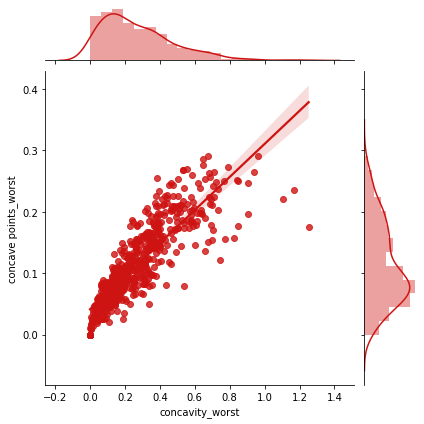

In [14]:
sns.jointplot(x.loc[:,'concavity_worst'],
             x.loc[:,'concave points_worst'],
             kind = 'regg',
             color = '#ce1413');

##Task 7: Observing the Distribution of Values and their Variance with Swarm Plots

* We have learned that violin plots are a great tool for visualizing sparse distributions. As our data set contains close to 600 rows, we might want to simply display each point in the same visualization.
* This need is satisfied by Seaborn's swarmplot() method. A swarm plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

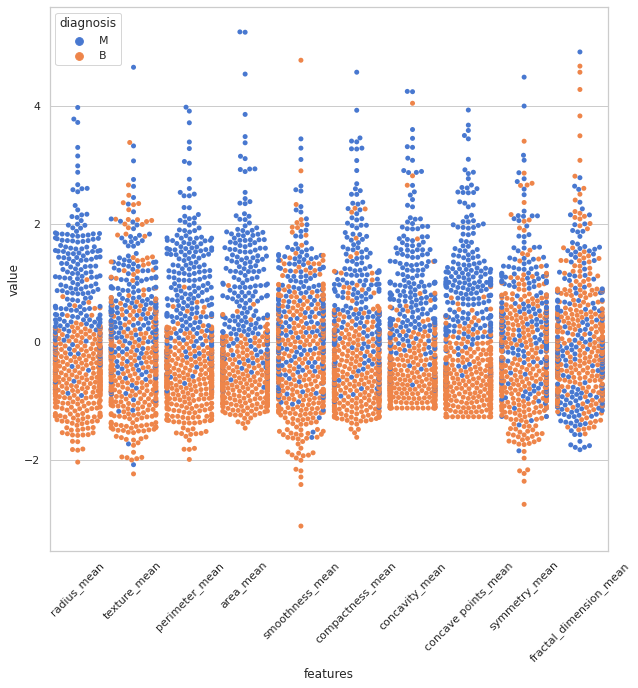

In [15]:
sns.set(style='whitegrid',palette='muted')
data = x 
data_std = (data-data.mean())/data.std()
data = pd.concat([y,data_std.iloc[:,0:10]],axis = 1)
data = pd.melt(data,id_vars = 'diagnosis',
               var_name = 'features',
               value_name = 'value')
plt.figure(figsize=(10,10))

sns.swarmplot(x = 'features', y = 'value', hue = 'diagnosis' ,data = data);
plt.xticks(rotation=45);

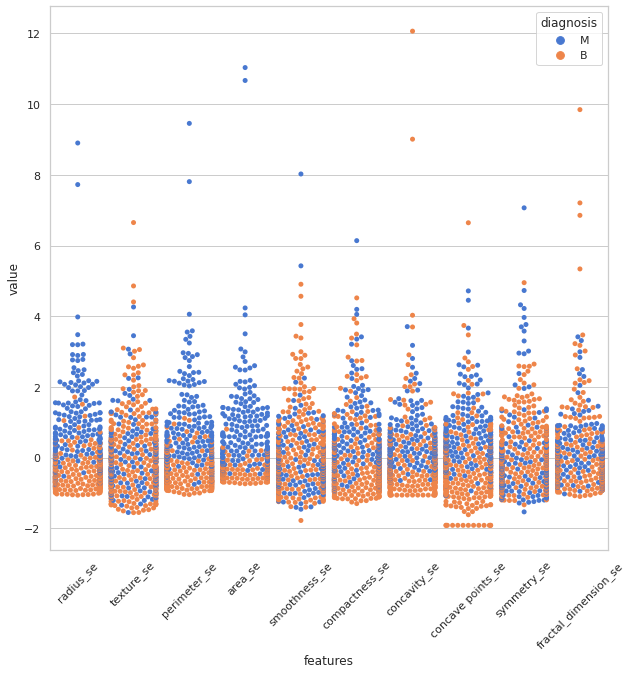

In [16]:
sns.set(style='whitegrid',palette='muted')
data = pd.concat([y,data_std.iloc[:,10:20]],axis = 1)
data = pd.melt(data,id_vars = 'diagnosis',
               var_name = 'features',
               value_name = 'value')
plt.figure(figsize=(10,10))

sns.swarmplot(x = 'features', y = 'value', hue = 'diagnosis' ,data = data);
plt.xticks(rotation=45);

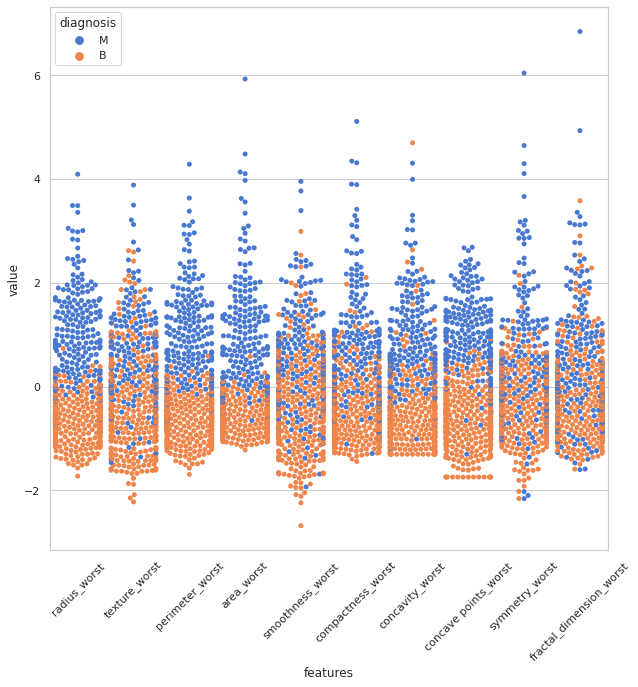

In [17]:
sns.set(style='whitegrid',palette='muted')
data = pd.concat([y,data_std.iloc[:,20:30]],axis = 1)
data = pd.melt(data,id_vars = 'diagnosis',
               var_name = 'features',
               value_name = 'value')
plt.figure(figsize=(10,10))

sns.swarmplot(x = 'features', y = 'value', hue = 'diagnosis' ,data = data);
plt.xticks(rotation=45);

##Task 8: Observing all Pairwise Correlations

* A good way to identify correlations between features is to visualize the correlation matrix as a heatmap.
* We will make a note of the correlated features so that we can drop them from our data set before building a predictive model in the next project.
* In the next project, we will remove these correlated features and analyze the classification accuracy we get using XGBoost, a boosted decision tree classifier. We will then employ various feature selection and feature extraction methods to get the most predictive features and improve our classification accuracy.

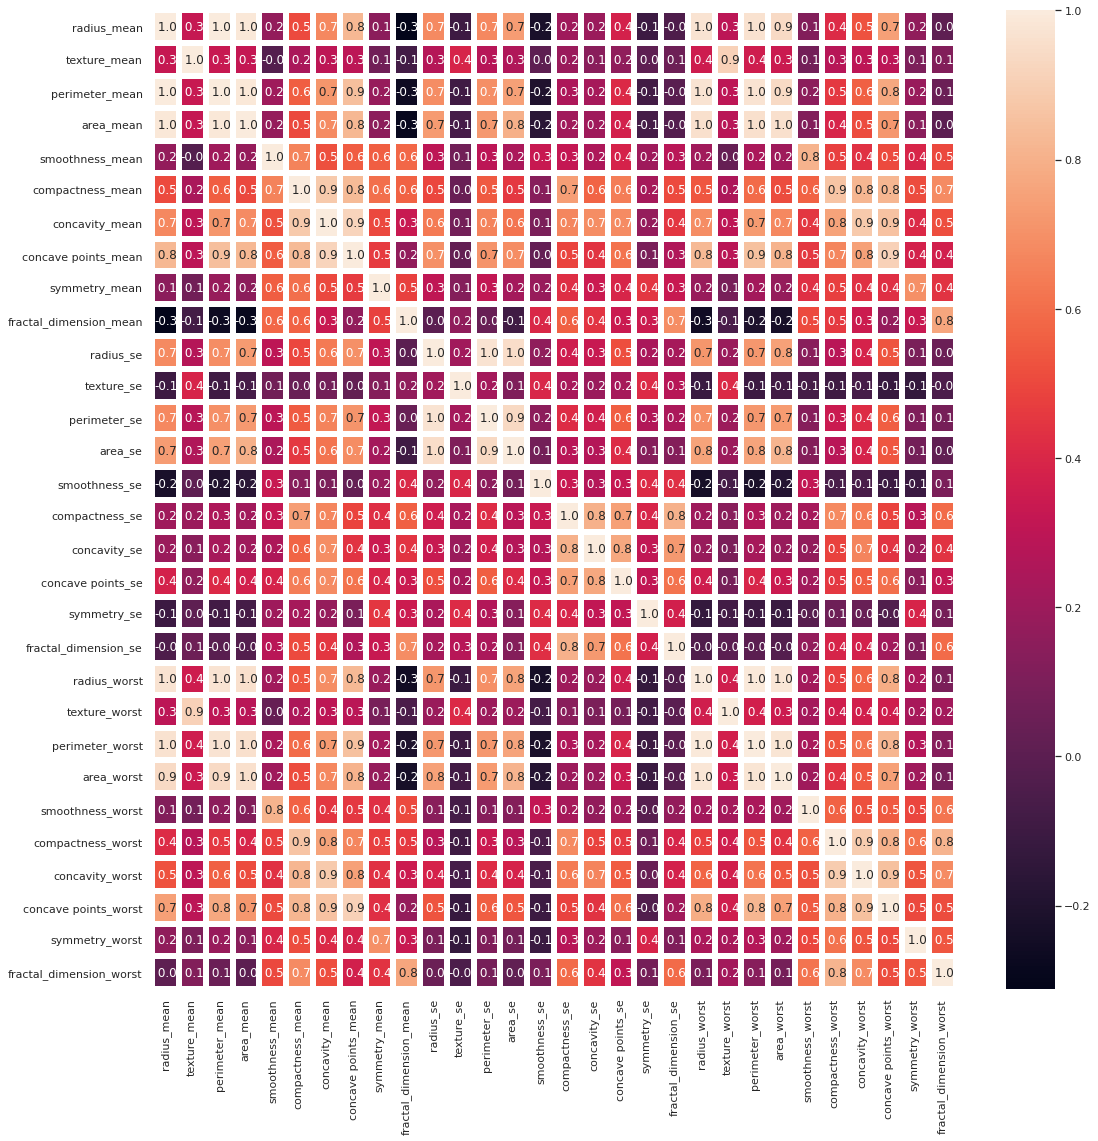

In [18]:
f,ax = plt.subplots(figsize=(18,18))
sns.heatmap(x.corr(),annot=True,linewidth = 5, fmt =' .1f',ax = ax);

#Tumor Diagnosis (Part 2): Feature Selection and Classification

## Task 3: Dropping Corrleated Columns from Feature Matrix

In [19]:
drop_cols = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se',
 'perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst',
 'compactness_se','concave points_se','texture_worst','area_worst']

df = x.drop(drop_cols,axis = 1)
df.head()


,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


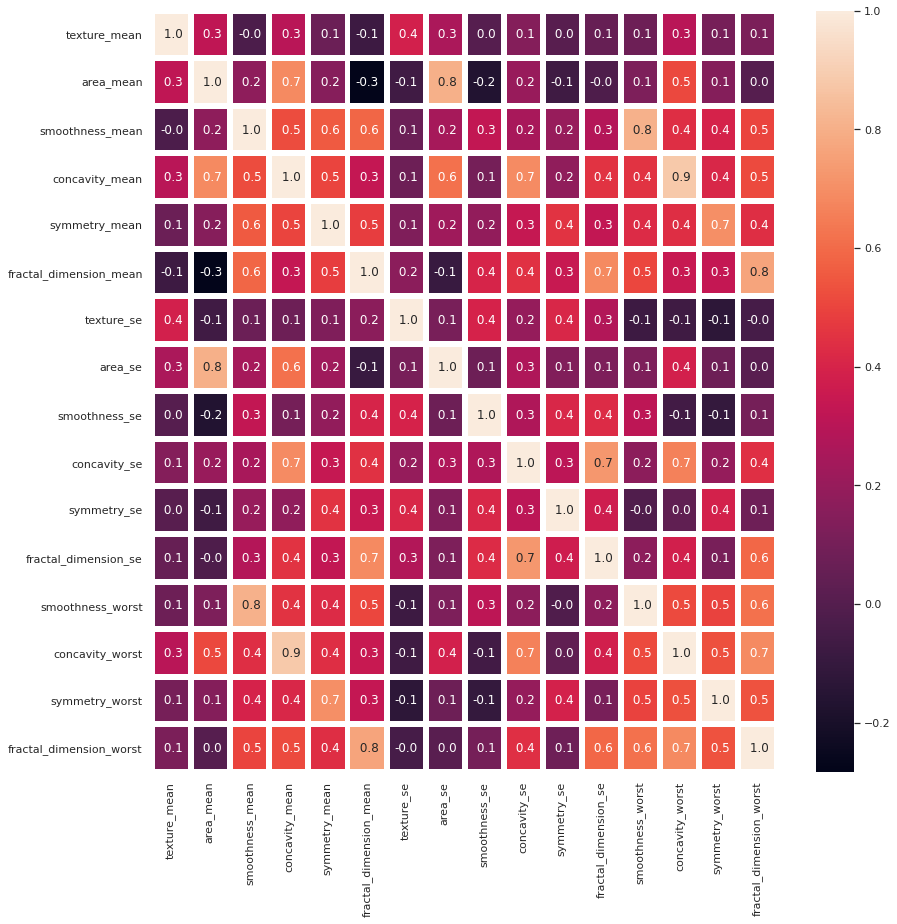

In [20]:
f,ax = plt.subplots(figsize = (14,14))
sns.heatmap(df.corr(),annot=True,linewidth = 5, fmt =' .1f',ax = ax);

## Task 4: Classification using XGBoost (minimal feature selection)

In [21]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

In [22]:
x_train,x_test,y_train,y_test = train_test_split(df,y,test_size = 0.3,random_state = 42)
clf_1 = xgb.XGBClassifier(random_state = 42)
clf_1 = clf_1.fit(x_train,y_train)

In [23]:
print("Accuracy is: ", accuracy_score(y_test,clf_1.predict(x_test)))

Accuracy is:  0.9766081871345029


Accuracy is:  0.9766081871345029


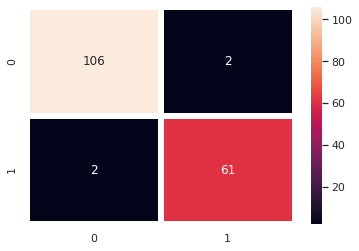

In [24]:
print("Accuracy is: ", accuracy_score(y_test,clf_1.predict(x_test)))
cm = confusion_matrix(y_test,clf_1.predict(x_test))
sns.heatmap(cm,annot=True,linewidth = 5, fmt ='d');

## Task 5: Univariate Feature Selection

In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [26]:
select_feature = SelectKBest(chi2,k=10).fit(x_train,y_train)
print("Score List: ",select_feature.scores_)
print("Feature List: ", x_train.columns)

Score List:  [6.06916433e+01 3.66899557e+04 1.00015175e-01 1.30547650e+01
 1.95982847e-01 3.42575072e-04 4.07131026e-02 6.12741067e+03
 1.32470372e-03 6.92896719e-01 1.39557806e-03 2.65927071e-03
 2.63226314e-01 2.58858117e+01 1.00635138e+00 1.23087347e-01]
Feature List:  Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


Accuracy is:  0.9707602339181286


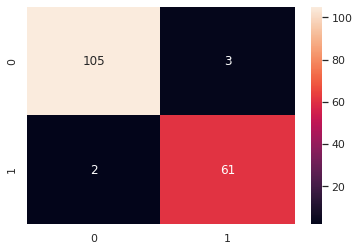

In [27]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
clf_2 = xgb.XGBClassifier().fit(x_train_2,y_train)
print("Accuracy is: ", accuracy_score(y_test,clf_2.predict(x_test_2)))
cm_2 = confusion_matrix(y_test,clf_2.predict(x_test_2))
sns.heatmap(cm_2,annot = True, fmt = 'd')

## Task 6: Recursive Feature Elimination 


In [30]:
from sklearn.feature_selection import RFECV # recursive_features_with crossvalidate

clf_3 = xgb.XGBClassifier()
rfecv = RFECV(estimator= clf_3,step = 1,cv=5, scoring = 'accuracy').fit(x_train,y_train)

print("Optimal number of features: ", rfecv.n_features_)
print("Best features: ", x_train.columns[rfecv.support_])

Optimal number of features:  16
Best features:  Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


In [32]:
print("Accuracy is: ", accuracy_score(y_test,rfecv.predict(x_test)))


Accuracy is:  0.9766081871345029


[Text(0, 0.5, 'CV scores'), Text(0.5, 0, 'No. of selected features')]

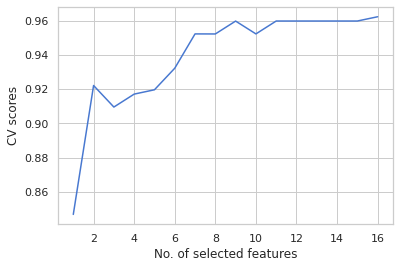

In [33]:
num_features = [i for i in range(1 , len(rfecv.grid_scores_) + 1)]
cv_scores = rfecv.grid_scores_
ax = sns.lineplot(x=num_features,y=cv_scores)
ax.set(xlabel='No. of selected features',ylabel='CV scores')

##Task 7: Feature Extraction using Principal Compoenent Analysis

In [34]:
x_train, x_test , y_train, y_test = train_test_split(x, y, test_size =0.3 , random_state =42)
x_train_norm = (x_train - x_train.mean())/(x_train.max()-x_train.min())
x_test_norm = (x_test - x_test.mean())/(x_test.max()-x_test.min())

Text(0, 0.5, 'Cumulative explained variances')

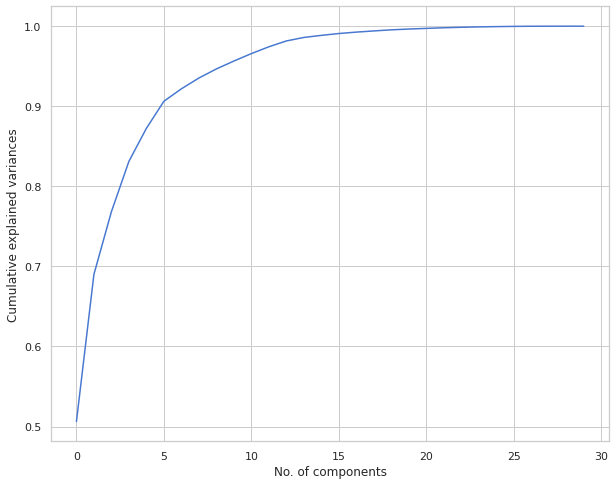

In [35]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x_train_norm)
plt.figure(1,figsize = (10,8))
sns.lineplot(data = np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No. of components')
plt.ylabel('Cumulative explained variances')